## Understanding Padding and Pooling in CNN

### Question 1

Pooling, also known as subsampling or downsampling, is a technique used in Convolutional Neural Networks (CNNs) to reduce the spatial dimensions of the feature maps produced by convolutional layers. The main purposes of pooling are:

- Dimensionality Reduction: Pooling reduces the spatial size (width and height) of the feature maps, reducing the number of parameters and computation in the network. This helps in controlling overfitting and makes the model more computationally efficient.

- Translation Invariance: Pooling helps create feature maps that are invariant to small translations in the input, making the learned features more robust to variations in the position of objects within the input images.

- Feature Extraction: By selecting the most relevant information from each local region of the feature maps, pooling helps retain important features while discarding less relevant or redundant information.

### Question 2

- Max Pooling: Max pooling selects the maximum value from each local region of the input feature map. It helps in preserving the most prominent features in each region while discarding less significant ones.

- Average Pooling: Average pooling computes the average value of each local region of the input feature map. It tends to blur the features but can be useful when preserving spatial information is more important than preserving specific features.

### Question 3

Padding is the process of adding extra border pixels to the input data before applying convolutional operations. It is primarily used to control the spatial dimensions of the output feature maps.

- Mitigation of Border Effects: Without padding, the spatial dimensions of the output feature maps would shrink with each convolutional layer, leading to loss of information at the borders of the input data. Padding helps mitigate this issue by allowing the convolutional operation to cover the entire input region.

### Question 4

- Zero-padding: In zero-padding, extra border pixels with zero values are added to the input data. It preserves the spatial dimensions of the input data and ensures that the output feature maps have the same spatial dimensions as the input. Zero-padding is commonly used to prevent information loss at the borders of the input data.

- Valid-padding: In valid-padding (also known as "no-padding"), no extra border pixels are added to the input data. As a result, the spatial dimensions of the output feature maps are reduced compared to the input. Valid-padding is often used when the spatial dimensions of the input data can be effectively reduced without losing important information.

The impact of padding on the output feature map size depends on the choice of padding technique:

- With Zero-padding: The output feature map size remains the same as the input size when zero-padding is applied. Each border of the input is padded with zeros, ensuring that the convolutional operation covers the entire input region without reducing the spatial dimensions.

- With Valid-padding: The output feature map size decreases compared to the input size when valid-padding is applied. Since no padding is added to the input data, the spatial dimensions of the output feature maps shrink with each convolutional operation, resulting in a reduction in size.

## Exploring LeNet

### Question 1

LeNet-5 is a pioneering convolutional neural network (CNN) architecture developed by Yann LeCun et al. in 1998 for handwritten digit recognition tasks. It consists of several layers, including convolutional layers, pooling layers, and fully connected layers. LeNet-5 played a significant role in popularizing CNNs and laid the foundation for modern deep learning architectures.

### Question 2

- Input Layer: The input layer accepts the input image data, typically grayscale images of handwritten digits.

- Convolutional Layers: LeNet-5 consists of two convolutional layers, each followed by a subsampling (pooling) layer. The convolutional layers extract features from the input images using learnable filters.

- Pooling Layers: The pooling layers downsample the feature maps obtained from the convolutional layers, reducing their spatial dimensions while preserving important features.

- Fully Connected Layers: The last two layers of LeNet-5 are fully connected layers. These layers combine the features learned by the convolutional layers and make predictions based on them. The final fully connected layer produces output probabilities for each class (e.g., digits 0-9).

- Activation Functions: LeNet-5 uses the sigmoid activation function in its hidden layers and softmax activation in the output layer for multi-class classification

### Question 3

Advantages:

- Effective Feature Extraction: LeNet-5 demonstrates the effectiveness of convolutional layers in automatically learning hierarchical features from raw pixel data.
- Simplicity: The architecture of LeNet-5 is relatively simple compared to modern CNNs, making it easy to understand and implement.
- Scalability: While originally designed for handwritten digit recognition, LeNet-5 can be adapted and scaled for various image classification tasks.


Limitations:

- Limited Capacity: LeNet-5 may struggle with more complex datasets due to its relatively shallow architecture and lack of modern techniques like batch normalization and residual connections.
- Sensitivity to Image Variations: LeNet-5 may not perform well on datasets with significant variations in image appearance, such as variations in scale, rotation, or illumination.

In [10]:
### Question 4
### Implementing Lenet-5 on MNIST dataset

In [1]:
!pip install tensorflow keras --quiet

In [2]:
import tensorflow as tf
import keras

2024-04-23 06:52:37.087793: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 06:52:37.319562: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-23 06:52:38.241696: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-23 06:52:40.296198: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
print(tf.__version__)
print(keras.__version__)

2.16.1
3.3.2


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, AveragePooling2D, Dropout

In [5]:
from keras.datasets import mnist

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [6]:
X_val = X_train[:6000]
X_train = X_train[6000:]
y_val = y_train[:6000]
y_train = y_train[6000:]

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val.reshape(X_val.shape[0], 28, 28, 1)

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

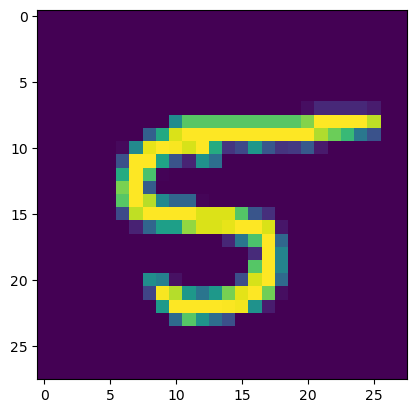

In [10]:
import matplotlib.pyplot as plt

plt.imshow(X_train[4])

In [11]:
## Defining the lenet model

model = Sequential()

model.add(Conv2D(6, kernel_size = (5,5), activation = "tanh", input_shape = [28,28,1]))
model.add(AveragePooling2D((2,2)))
          
model.add(Conv2D(16, kernel_size = (10,10), activation = "tanh"))
model.add(AveragePooling2D(2,2))
          
model.add(Flatten())          
model.add(Dense(120, activation = "tanh"))
model.add(Dense(84, activation = "tanh"))
model.add(Dense(10, activation = "softmax"))
          
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 16)       │         9,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 1, 1, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │         2,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,826 (89.16 KB)

 Trainable params: 22,826 (89.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [13]:
history = model.fit(X_train, y_train, 
                   batch_size = 40,
                   epochs = 5, validation_data = (X_val, y_val))

Epoch 1/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8214 - loss: 0.5771 - val_accuracy: 0.9598 - val_loss: 0.1436
Epoch 2/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9585 - loss: 0.1397 - val_accuracy: 0.9662 - val_loss: 0.1187
Epoch 3/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9707 - loss: 0.0988 - val_accuracy: 0.9750 - val_loss: 0.0840
Epoch 4/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9765 - loss: 0.0798 - val_accuracy: 0.9765 - val_loss: 0.0819
Epoch 5/5
1350/1350 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9790 - loss: 0.0666 - val_accuracy: 0.9747 - val_loss: 0.0814


<AxesSubplot: >

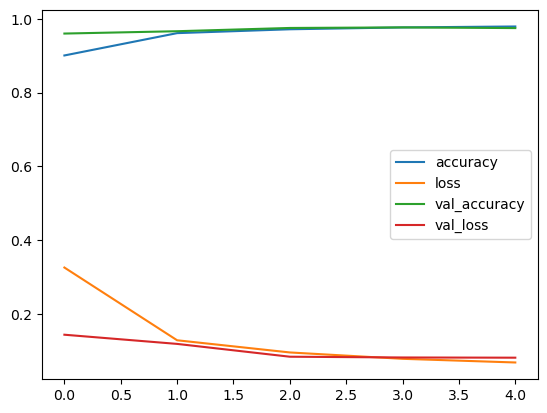

In [14]:
import pandas as pd

df = pd.DataFrame(history.history)

df.plot()

In [15]:
loss, acc = model.evaluate(X_test, y_test)

print(loss, acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9682 - loss: 0.1011
0.07932370901107788 0.9747999906539917


In [18]:
data = X_test[566].reshape(1,28,28,1)

In [19]:
pred = model.predict(data)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[5.6092325e-05, 3.1874424e-05, 2.1663975e-05, 9.6041013e-08,
        1.1158461e-04, 5.3266009e-05, 9.9964023e-01, 8.3200282e-09,
        8.5117623e-05, 1.0643188e-07]], dtype=float32)

In [20]:
pred.argmax()

6

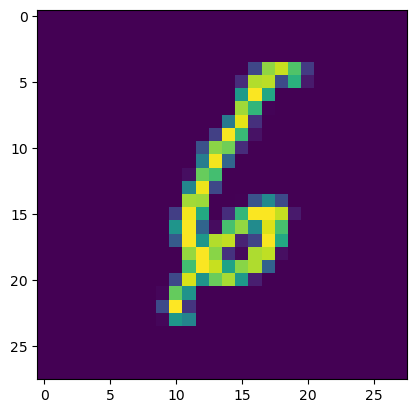

In [22]:
plt.imshow(X_test[566])

## Analyzing AlexNet

### Question 1

AlexNet is a deep convolutional neural network architecture proposed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It was a significant milestone in the field of deep learning, particularly in the domain of image classification. AlexNet won the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2012 by achieving a significant improvement in accuracy over previous methods.

### Question 2

- Deep Architecture: AlexNet was one of the first deep convolutional neural networks with multiple layers. It consisted of five convolutional layers followed by max-pooling layers and three fully connected layers.

- ReLU Activation: AlexNet utilized the Rectified Linear Unit (ReLU) activation function instead of the traditional sigmoid or tanh activations. ReLU helped alleviate the vanishing gradient problem and accelerated the convergence of training.

- Local Response Normalization (LRN): AlexNet employed LRN layers after the first and second convolutional layers. LRN helped enhance the contrast between different feature maps, improving the model's generalization ability.

- Dropout: AlexNet introduced the concept of dropout regularization, randomly dropping out units during training to prevent overfitting. This regularization technique helped improve the model's robustness and generalization performance.

- Data Augmentation: The authors applied data augmentation techniques such as cropping, flipping, and color jittering to artificially increase the size of the training dataset. Data augmentation helped reduce overfitting and improved the model's ability to generalize to unseen data.

### Question 3

- Convolutional Layers: The convolutional layers in AlexNet were responsible for extracting features from the input images through convolution operations with learnable filters. These layers learned to detect low-level features like edges and textures in the initial layers and progressively more complex features in deeper layers.

- Pooling Layers: The pooling layers performed downsampling of the feature maps obtained from the convolutional layers, reducing their spatial dimensions while retaining the most important features. Max-pooling was used in AlexNet to select the maximum value from each local region of the feature maps.

- Fully Connected Layers: The fully connected layers in AlexNet combined the features learned by the convolutional layers and made predictions based on them. These layers performed classification by mapping the high-level features to the output classes using learned weights and biases.

### Question 4

In [23]:
### ALex net implementation
## Using the fashion mnist dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train) , (X_test, y_test) = fashion_mnist.load_data()

X_train.shape, y_train.shape,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
X_val = X_train[:5000]
X_train = X_train[5000:]
y_val = y_train[:5000]
y_train = y_train[5000:]


X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val.reshape(X_val.shape[0], 28, 28, 1)


X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0


In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

In [7]:
## Defining the alex net architecture

model = Sequential()

model.add(Conv2D(96, kernel_size = (11, 11), strides = 4, input_shape = (28, 28, 1), activation = "relu", padding= 'same',  
                 kernel_initializer= 'he_normal'))
model.add(MaxPooling2D((3,3), strides = (2,2), padding= 'same', data_format= None))

model.add(Conv2D(256, kernel_size = (5, 5), strides = 1, activation = "relu", padding = "same", kernel_initializer="he_normal"))
model.add(MaxPooling2D((3,3), strides = (2,2), padding= 'same', data_format= None))

model.add(Conv2D(384, kernel_size = (3, 3), strides = 1, activation = "relu", padding = "same", kernel_initializer="he_normal"))
model.add(Conv2D(384, kernel_size = (3, 3), strides = 1, activation = "relu", padding = "same", kernel_initializer="he_normal"))
model.add(Conv2D(256, kernel_size = (3, 3), strides = 1, activation = "relu", padding = "same", kernel_initializer="he_normal"))
model.add(MaxPooling2D(pool_size=(3,3), strides= (2,2),
                              padding= 'same', data_format= None))
                 
model.add(Flatten())
model.add(Dense(4096, activation = "relu"))
model.add(Dense(4096, activation = "relu"))
model.add(Dense(1000, activation = "relu"))          

model.add(Dense(10, activation = "softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 7, 7, 96)       │        11,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 4, 4, 256)      │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 2, 2, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │     1,052,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     4,097,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,664,962 (97.90 MB)

 Trainable params: 25,664,962 (97.90 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer= tf.keras.optimizers.Adam(0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train,
                   epochs = 4, validation_data = (X_val, y_val))

Epoch 1/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 242s 139ms/step - accuracy: 0.6079 - loss: 0.9837 - val_accuracy: 0.8456 - val_loss: 0.4842
Epoch 2/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 233s 136ms/step - accuracy: 0.8494 - loss: 0.4346 - val_accuracy: 0.8736 - val_loss: 0.3583
Epoch 3/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 234s 136ms/step - accuracy: 0.8730 - loss: 0.3686 - val_accuracy: 0.8850 - val_loss: 0.3638
Epoch 4/4
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 234s 136ms/step - accuracy: 0.8841 - loss: 0.3267 - val_accuracy: 0.8850 - val_loss: 0.3416


In [13]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8716 - loss: 0.3845


[0.37555423378944397, 0.8733999729156494]

In [14]:
data = X_test[450].reshape(28, 28, 1)

In [16]:
pred = model.predict(data)
pred.argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


6